# Phase 0 — Data Preparation

As a Data Scientist, the most tedious task which we encounter is the acquiring and the preparation of a data set. Even though there is an abundance of data in this era, it is still hard to find a suitable data set that suits the problem you are trying to tackle

In [1]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafile="dset_diabetes.csv"

In [3]:
dataset=pandas.read_csv(datafile)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN,NaN,NaN,NaN,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN,NaN,NaN,NaN,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN,NaN,NaN,NaN,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN,NaN,NaN,NaN,NaN


# Phase 1 — Data Exploration

When encountered with a data set, first we should analyze and “get to know” the data set. This step is necessary to familiarize with the data, to gain some understanding of the potential features and to see if data cleaning is needed.

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
763,10,101,76,48,180,32.9,0.171,63,0,NaN,NaN,NaN,NaN,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN,NaN,NaN,NaN,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN,NaN,NaN,NaN,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN,NaN,NaN,NaN,NaN
767,1,93,70,31,0,30.4,0.315,23,0,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [5]:
print(dataset.shape)

(768, 14)


In [6]:
#The role of groupby() is anytime we want to analyze data by 
# some categories. The simplest call must have a column name.
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [7]:
dataset.groupby('Outcome')

In [8]:
dataset.groupby('Glucose').size()
#d.head(5)

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64

In [9]:
print(dataset.groupby('Age').size())

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64


In [10]:
print(dataset.groupby('Outcome').groups)

{0: [1, 3, 5, 7, 10, 12, 18, 20, 21, 27, 28, 29, 30, 32, 33, 34, 35, 36, 40, 41, 42, 44, 46, 47, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 112, 113, 117, 118, 119, 121, 122, 123, 126, 127, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, ...], 1: [0, 2, 4, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 31, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72, 78, 84, 88, 93, 99, 100, 109, 110, 111, 114, 115, 116, 120, 124, 125, 128, 129, 130, 131, 132, 143, 152, 154, 155, 159, 164, 165, 170, 171, 175, 177, 179, 185, 186, 187, 188, 189, 192, 193, 195, 197, 198, 199, 206, 207, 209, 213, 214, 215, 216, 218, 219, 220, 221, 227, 230, 231, 235, 236, 237, 238, 242, 243, 245, 254, 255, 259, 261, ...]}


In [11]:
#print(dataset.groupby('Age').groups)

In [12]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pandas.DataFrame(ipl_data)
print(df)
print (df.groupby('Team').groups)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
{'Devils': [2, 3], 'Kings': [4, 5, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10]}


In [13]:
# The describe() method is used for calculating some statistical data like percentile, mean and 
# std of the numerical values of the Series or DataFrame. 
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types
# DataFrame.describe(percentiles=None, include=None, exclude=None)  
#It returns the statistical summary of the Series and DataFrame.
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,0.0,0.0,0.0,0.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,NaN,NaN,NaN,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,NaN,NaN,NaN,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,NaN,NaN,NaN,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN,NaN,NaN,NaN
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,NaN,NaN,NaN,NaN


In [14]:
# data types
print(" Data types for each attributes ")
print(dataset.dtypes)

 Data types for each attributes 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Unnamed: 9                  float64
Unnamed: 10                 float64
Unnamed: 11                 float64
Unnamed: 12                 float64
Unnamed: 13                  object
dtype: object


Skewness is a measure of asymmetry of a distribution.
· In a normal distribution, the mean divides the curve symmetrically into two equal parts at  the median and the value of skewness is zero.
· When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
· When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
· When the value of the skewness is positive, the tail of the distribution is longer towards the  right hand side of the curve   
    

In [15]:
from IPython.display import Image
  # get the image
Image(url="skew.png", width=500, height=500)

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2
and the tail is larger towards the left hand side of the distribution.
A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the 
tail is larger towards the right hand side of the distribution.
#The DataFrame class of pandas has a method skew() that computes the skewness of the data present 
#in a given axis of the DataFrame object.
#Skewness is computed for each row or each column of the data present in the DataFrame object.
# Syntax: 
#dataFrame.skew(axis=1)

In [16]:
import pandas as pd
dataVal = [(10,20,30,40,50,60,70),
           (10,10,40,40,50,60,70),
           (10,20,30,50,50,60,80)]
dataFrame = pd.DataFrame(dataVal);
skewValue = dataFrame.skew(axis=1)
print("DataFrame:\n", dataFrame)
print("Skew:")
print(skewValue)

DataFrame:
     0   1   2   3   4   5   6
0  10  20  30  40  50  60  70
1  10  10  40  40  50  60  70
2  10  20  30  50  50  60  80
Skew:
0    0.000000
1   -0.340998
2    0.121467
dtype: float64


In [19]:
dataset.skew()

<ipython-input-19-8035be43cde7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
Unnamed: 9                       NaN
Unnamed: 10                      NaN
Unnamed: 11                      NaN
Unnamed: 12                      NaN
dtype: float64

In [20]:
sk=dataset.skew(axis=1)
print("SKEW")
print(sk)

SKEW
0      1.647973
1      1.008375
2      2.361142
3      0.711041
4      1.339072
         ...   
763    1.228541
764    1.547438
765    0.907577
766    1.642407
767    1.148599
Length: 768, dtype: float64


<ipython-input-20-5167470cd1fd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sk=dataset.skew(axis=1)


In [21]:
dataset.mean()

<ipython-input-21-e55bc0ed4499>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Unnamed: 9                         NaN
Unnamed: 10                        NaN
Unnamed: 11                        NaN
Unnamed: 12                        NaN
dtype: float64

In [22]:
dataset.median()

<ipython-input-22-e22d0dc743ec>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.median()


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Unnamed: 9                       NaN
Unnamed: 10                      NaN
Unnamed: 11                      NaN
Unnamed: 12                      NaN
dtype: float64

In [23]:
data = {'COUNT':dataset.count(),'MEAN':dataset.mean(),'MEDIAN':dataset.median(),'SD':dataset.std(),
       'VAR':dataset.var(),'SKEW':dataset.skew()}       
df1 = pandas.DataFrame(data)
print(df1)
df1.to_csv('Dia_output.csv')

                          COUNT        MEAN    MEDIAN          SD  \
Age                         768   33.240885   29.0000   11.760232   
BMI                         768   31.992578   32.0000    7.884160   
BloodPressure               768   69.105469   72.0000   19.355807   
DiabetesPedigreeFunction    768    0.471876    0.3725    0.331329   
Glucose                     768  120.894531  117.0000   31.972618   
Insulin                     768   79.799479   30.5000  115.244002   
Outcome                     768    0.348958    0.0000    0.476951   
Pregnancies                 768    3.845052    3.0000    3.369578   
SkinThickness               768   20.536458   23.0000   15.952218   
Unnamed: 10                   0         NaN       NaN         NaN   
Unnamed: 11                   0         NaN       NaN         NaN   
Unnamed: 12                   0         NaN       NaN         NaN   
Unnamed: 13                   6         NaN       NaN         NaN   
Unnamed: 9                    0   

<ipython-input-23-093a9f675147>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = {'COUNT':dataset.count(),'MEAN':dataset.mean(),'MEDIAN':dataset.median(),'SD':dataset.std(),
<ipython-input-23-093a9f675147>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'VAR':dataset.var(),'SKEW':dataset.skew()}


In [24]:
dataset.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,99.0,70.0,0.0,0.0,32.0,0.254,22.0,0.0,NaN,NaN,NaN,NaN,10
1,NaN,100.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN,NaN,NaN,NaN,NaN,1000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


In [25]:
# Pandas isnull() function detect missing values in the given series object. 
# It return a boolean same-sized object indicating if the values are NA. 
# Missing values gets mapped to True and non-missing value gets mapped to False.
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,True,True,True,True,True
764,False,False,False,False,False,False,False,False,False,True,True,True,True,True
765,False,False,False,False,False,False,False,False,False,True,True,True,True,True
766,False,False,False,False,False,False,False,False,False,True,True,True,True,True


In [26]:
#dataframe.sum() function return the sum of the values for the requested axis. 
#Use sum() function to find the sum of all the values over the column axis.
#If the input is index axis then it adds all the values in a column and repeats the same for all the columns and returns a
#series containing the sum of all the values in each column. It also provides support to skip the missing values in the 
#dataframe while calculating the sum in the dataframe.
dataset.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Unnamed: 9                  768
Unnamed: 10                 768
Unnamed: 11                 768
Unnamed: 12                 768
Unnamed: 13                 762
dtype: int64

In [27]:
dataset.sum()

<ipython-input-27-971b491c3383>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.sum()


Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
Unnamed: 9                      0.000
Unnamed: 10                     0.000
Unnamed: 11                     0.000
Unnamed: 12                     0.000
dtype: float64

In [28]:
dataset.sum(axis = 1, skipna = True)     # We are going to set skipna to be true. 
                                        # If we do not skip the NaN values then it will result in NaN values.

<ipython-input-28-1101bbd25ef4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.sum(axis = 1, skipna = True)     # We are going to set skipna to be true.


0      346.227
1      238.951
2      311.972
3      322.267
4      459.388
        ...   
763    511.071
764    285.140
765    389.445
766    265.449
767    248.715
Length: 768, dtype: float64

In [29]:
dataset.mean()

<ipython-input-29-e55bc0ed4499>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Unnamed: 9                         NaN
Unnamed: 10                        NaN
Unnamed: 11                        NaN
Unnamed: 12                        NaN
dtype: float64

In [30]:
#DataFrame.copy(deep=True)[source]
#Make a copy of this object’s indices and data.
#When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
#Modifications to the data or indices of the copy will not be reflected in the original object.
#When deep=False, a new object will be created without copying the calling object’s data or index (only references 
#to the data and index are copied). Any changes to the data of the original will be reflected in the shallow copy(and vice versa).

In [31]:
df=dataset.copy(deep=False)
print("original dataset\n",dataset)
print("copied dataset\n",df)
df1=df[(df['Glucose']==0)] 
df1

original dataset
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Unnamed: 9  Unnamed: 10  \
0                    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
75,1,0,48,20,0,24.7,0.140,22,0,NaN,NaN,NaN,NaN,NaN
182,1,0,74,20,23,27.7,0.299,21,0,NaN,NaN,NaN,NaN,NaN
342,1,0,68,35,0,32.0,0.389,22,0,NaN,NaN,NaN,NaN,NaN
349,5,0,80,32,0,41.0,0.346,37,1,NaN,NaN,NaN,NaN,NaN
502,6,0,68,41,0,39.0,0.727,41,1,NaN,NaN,NaN,NaN,NaN


In [33]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Unnamed: 9                  5
Unnamed: 10                 5
Unnamed: 11                 5
Unnamed: 12                 5
Unnamed: 13                 5
dtype: int64

# Boxplot 

In [34]:
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. 
Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box 
and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th
percentiles. These percentiles are also known as the lower quartile, median and upper quartile.
A box plot consist of 5 things.
Minimum
First Quartile or 25%
Median (Second Quartile) or 50%
Third Quartile or 75%
Maximum

SyntaxError: invalid syntax (<ipython-input-34-295540c14eb2>, line 1)

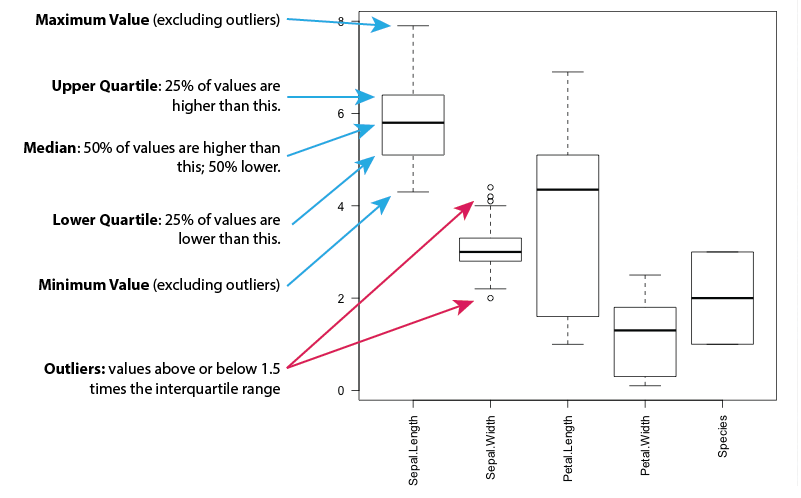

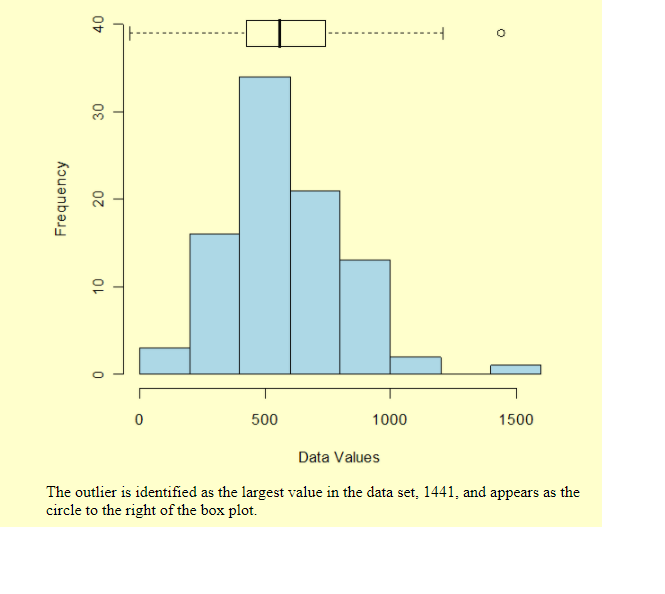

<AxesSubplot:>

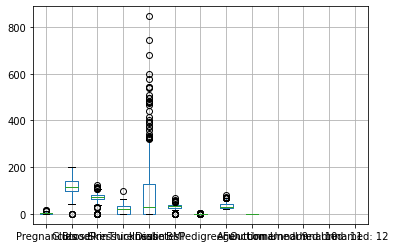

In [35]:
df.boxplot(vert=True)

<AxesSubplot:>

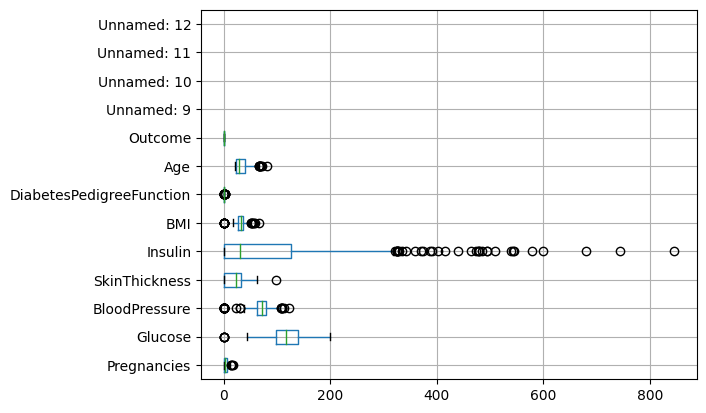

In [36]:
df.boxplot(vert=False)

In [37]:
#The fillna() method replaces the NULL values with a specified value.
#The fillna() method returns a new DataFrame object unless the inplace parameter is set to True, 
#in that case the fillna() method does the replacing in the original DataFrame instead.
#fillna() function is used to fill NA/NaN values using the specified method.
Syntax: dataframe.fillna(value, method, axis, inplace, limit, downcast)

NameError: name 'dataframe' is not defined

In [38]:
import pandas as pd
import numpy as np
df = pd.DataFrame(
[[np.nan, 72, 67],
[23, 78, 62],
[32, 74, np.nan],
[np.nan, 54, 76]],
columns=['a', 'b', 'c'])
df_result = df.fillna("Not", inplace=False)
print('Original DataFrame\n', df) 
print('\nResulting DataFrame\n', df_result) 
df_result1 = df.fillna(0, inplace=True)

Original DataFrame
       a   b     c
0   NaN  72  67.0
1  23.0  78  62.0
2  32.0  74   NaN
3   NaN  54  76.0

Resulting DataFrame
       a   b     c
0   Not  72  67.0
1  23.0  78  62.0
2  32.0  74   Not
3   Not  54  76.0


# BarPLOT

In [39]:
#Pandas DataFrame.plot.bar() plots the graph vertically in form of rectangular bars.
#DataFrame.plot.bar(x=None, y=None, **kwds)
x : (label or position, optional) Allows plotting of one column versus another. 
    If not specified, the index of the DataFrame is used.
y : (label or position, optional) Allows plotting of one column versus another. 
    If not specified, all numerical columns are used.
**kwds : Additional keyword arguments
Returns: matplotlib.axes.Axes or np.ndarray of them

SyntaxError: invalid syntax (<ipython-input-39-8d99ab23d201>, line 3)

In [40]:
import matplotlib.pyplot  
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.random.rand(10, 3), columns =['a', 'b', 'c']) 
print(df1)

          a         b         c
0  0.292364  0.328489  0.778062
1  0.895157  0.183820  0.840312
2  0.387760  0.947954  0.376016
3  0.951970  0.682897  0.149285
4  0.457032  0.695075  0.193673
5  0.837873  0.925743  0.222783
6  0.815176  0.515790  0.373586
7  0.813054  0.889761  0.347333
8  0.559831  0.377876  0.337852
9  0.547162  0.416988  0.406882


<AxesSubplot:>

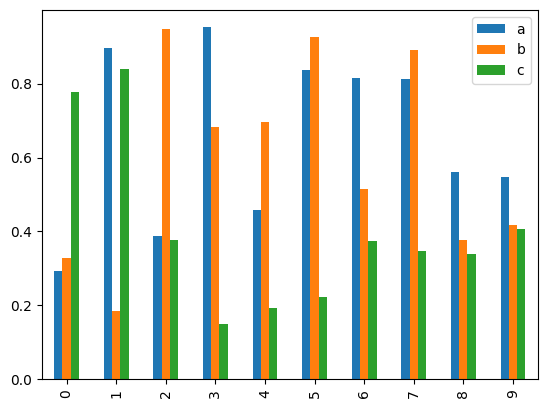

In [42]:
df1.plot.bar(stacked=False)

<AxesSubplot:>

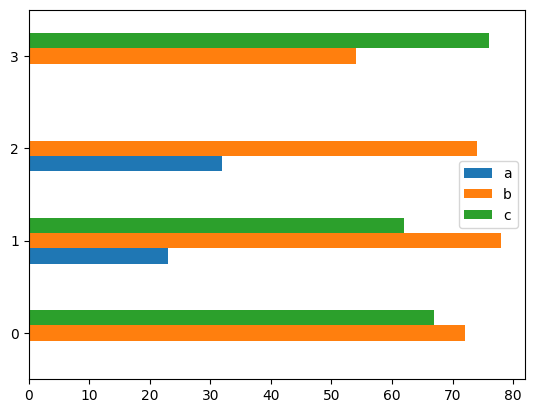

In [43]:
df.plot.barh(stacked=False)   # Horrizontal

<AxesSubplot:>

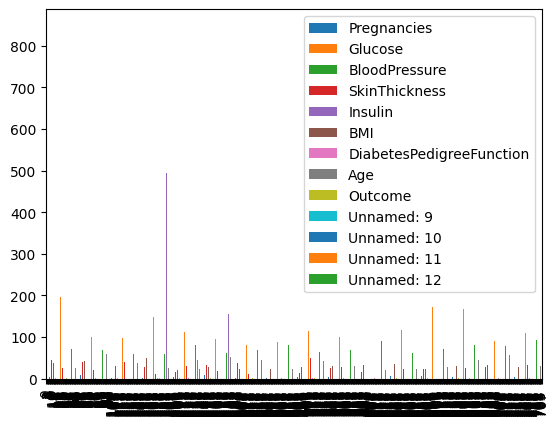

In [44]:
dataset.plot.bar()

In [45]:
#A Scatter plot is a type of data visualization technique that shows the relationship between two numerical variables. 
#For plotting to scatter plot using pandas there is DataFrame class and this class has a member called plot. 
#Calling the scatter() method on the plot member draws a plot between two variables or two columns of pandas DataFrame. 
#Syntax: DataFrame.plot.scatter(x, y, s = none, c = none)
#Parameter:
#x: column name to be used as horizontal coordinates for each point
#y: column name to be used as vertical coordinates for each point
#s: size of dots
#c: color of dots

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

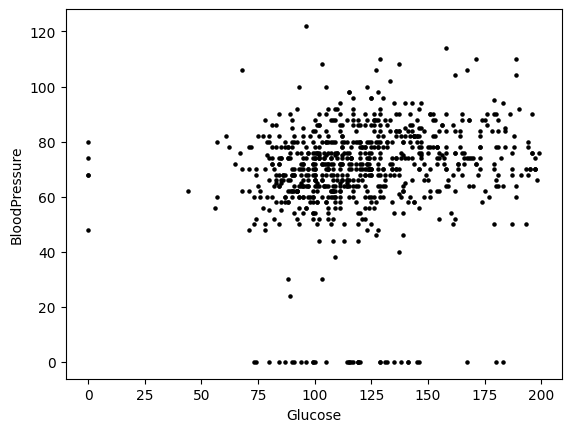

In [46]:
dataset.plot.scatter(x='Glucose', y='BloodPressure', s=5, c='black')

In [47]:
#The distribution of data is represented by Histogram. When Function Pandas DataFrame.hist() is used, 
#it automatically calls the function matplotlib.pyplot.hist() on each series in the DataFrame. 
#As the result, we obtained one histogram per column.
Its main functionality is to make the Histogram of a given Data frame. 
The distribution of data is represented by Histogram. 


SyntaxError: invalid syntax (<ipython-input-47-fb95a0f8f9b3>, line 4)

In [ ]:
dataset.plot.hist(bins=35)
#bins are the buckets that your histogram will be grouped by. On the back end, Pandas will group your data into bins, 
#or buckets. Then pandas will count how many values fell into that bucket, and plot the result.
#The easy way to think about bins is "how many bars do you want in your bar chart?"

In [ ]:
sns.displot(dataset['Glucose'], bins=100, color='r')

In [ ]:
sns.pairplot(dataset, hue="Outcome", diag_kind='hist') 

A great aspect of the Pandas module is the corr() method.
The corr() method calculates the relationship between each column in your data set.
Note: The corr() method ignores "not numeric" columns.
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
The number varies from -1 to 1.
1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) 
to call it a good correlation.
            Duration     Pulse  Maxpulse  Calories
  Duration  1.000000 -0.155408  0.009403  0.922721
  Pulse    -0.155408  1.000000  0.786535  0.025120
  Maxpulse  0.009403  0.786535  1.000000  0.203814
  Calories  0.922721  0.025120  0.203814  1.000000

Good Correlation:
"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

Bad Correlation:
"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

In [48]:
import pandas as pd
dataVal = [(10,20),(2,4),(3,6),(4,8)]
dataFrame = pd.DataFrame(data=dataVal);
print(dataFrame)
corr1= dataFrame.corr()
corr1


    0   1
0  10  20
1   2   4
2   3   6
3   4   8


,0,1
0,1.0,1.0
1,1.0,1.0


In [49]:
# Corelation Matrix
corr1= dataset.corr()
corr1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,NaN,NaN,NaN,NaN
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,NaN,NaN,NaN,NaN
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,NaN,NaN,NaN,NaN
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,NaN,NaN,NaN,NaN
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,NaN,NaN,NaN,NaN
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,NaN,NaN,NaN,NaN
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,NaN,NaN,NaN,NaN
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,NaN,NaN,NaN,NaN
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Seaborn is a Python library that is based on matplotlib and is used for data visualization. 
It provides a medium to present data in a statistical graph format as an informative and attractive medium to impart some 
information. 
A heatmap is one of the components supported by seaborn where variation in related data is portrayed using a color palette. 
This  focuses on a correlation heatmap and how seaborn in combination with pandas and matplotlib can be used to generate 
one for a dataframe.
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, 
using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear 
as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of 
measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns 
easily readable and highlights the differences and variation in the same data. A correlation heatmap, 
like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

SyntaxError: invalid syntax (<ipython-input-50-0244628f98da>, line 1)

In [ ]:
sns.heatmap(corr1, annot = True)